## Web Crawling
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crawling Naver Stock Data
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
import warnings
warnings.filterwarnings('ignore') # 경고 문구 안뜨게 해주는 설정
import requests
import pandas as pd

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [2]:
page_size, page = 30, 1
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=30&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [3]:
response =requests.get(url)
response

<Response [200]>

In [4]:
response.text[:500]

'[{"localTradedAt":"2024-03-21","closePrice":"2,737.45","compareToPreviousClosePrice":"47.31","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.76","openPrice":"2,731.18","highPrice":"2,738.21","lowPrice":"2,724.25"},{"localTradedAt":"2024-03-20","closePrice":"2,690.14","compareToPreviousClosePrice":"33.97","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.28","openPrice":"2,680.70","highPrice":"2,692.52","lowPrice":"2,'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [5]:
data = response.json() #리스트로 바꿔줌
type(data)

list

In [6]:
cols = ['localTradedAt', 'closePrice']
df = pd.DataFrame(data)[cols]
df.head()

,localTradedAt,closePrice
0,2024-03-21,"2,737.45"
1,2024-03-20,"2,690.14"
2,2024-03-19,"2,656.17"
3,2024-03-18,"2,685.84"
4,2024-03-15,"2,666.84"


#### 4. 함수로 만들기

In [7]:
def stock_price(code='KOSPI', page_size=60, page=1):
    # 1. URL
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    # 2. request(url)
    response = requests.get(url)
    # 3. parsing json
    data = response.json()
    # 4. 데이터프레임 
    cols = ['localTradedAt', 'closePrice']
    df = pd.DataFrame(data)[cols]
    #pd.DataFrame(response.json())[['localTradedAt', 'closePrice']] # 한줄로 줄일 수 있다
    
    return df

In [8]:
stock_price().head()

,localTradedAt,closePrice
0,2024-03-21,"2,738.00"
1,2024-03-20,"2,690.14"
2,2024-03-19,"2,656.17"
3,2024-03-18,"2,685.84"
4,2024-03-15,"2,666.84"


In [9]:
dfs = []
for page in range(1, 10):
    df = stock_price(page=page)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df

,localTradedAt,closePrice
0,2024-03-21,"2,737.45"
1,2024-03-20,"2,690.14"
2,2024-03-19,"2,656.17"
3,2024-03-18,"2,685.84"
4,2024-03-15,"2,666.84"
...,...,...
535,2022-01-17,"2,890.10"
536,2022-01-14,"2,921.92"
537,2022-01-13,"2,962.09"
538,2022-01-12,"2,972.48"


In [10]:
df = stock_price(code='KOSDAQ')
df

,localTradedAt,closePrice
0,2024-03-21,904.51
1,2024-03-20,891.45
2,2024-03-19,891.91
3,2024-03-18,894.48
4,2024-03-15,880.46
5,2024-03-14,887.52
6,2024-03-13,889.93
7,2024-03-12,889.71
8,2024-03-11,875.93
9,2024-03-08,873.18


#### 5. 원달러 환율 데이터 수집 : 실습

In [11]:
# 1. URL
code, page, page_size= 'FX_USDKRW', 1, 30
url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices\
?category=exchange&reutersCode={code}&page={page}&pageSize={page_size}'
# 2. request > response
response = requests.get(url)
# 3. json(str) > DataFrame
data = response.json()['result']
usd_df = pd.DataFrame(data)[['localTradedAt', 'closePrice']]
usd_df.tail(2)

,localTradedAt,closePrice
28,2024-02-07,"1,327.50"
29,2024-02-06,"1,330.00"


In [12]:
print(url)
response = requests.get(url)
response.text[:300]

https://m.stock.naver.com/front-api/v1/marketIndex/prices?category=exchange&reutersCode=FX_USDKRW&page=1&pageSize=30


'{"isSuccess":true,"detailCode":"","message":"","result":[{"localTradedAt":"2024-03-21","closePrice":"1,327.40","fluctuations":"-13.10","fluctuationsRatio":"-0.98","fluctuationsType":{"code":"5","text":"하락","name":"FALLING"},"cashBuyValue":"1,350.62","cashSellValue":"1,304.18","sendValue":"1,340.4","'

In [13]:
response.json()['result'][:1]

[{'localTradedAt': '2024-03-21',
  'closePrice': '1,327.40',
  'fluctuations': '-13.10',
  'fluctuationsRatio': '-0.98',
  'fluctuationsType': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'cashBuyValue': '1,350.62',
  'cashSellValue': '1,304.18',
  'sendValue': '1,340.4',
  'receiveValue': '1,314.4'}]

#### 6. 시각화

In [14]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
kospi_df = stock_price(page_size=30)
kosdaq_df = stock_price(code='KOSDAQ', page_size=30)

In [17]:
usd_df.tail(2)

,localTradedAt,closePrice
28,2024-02-07,"1,327.50"
29,2024-02-06,"1,330.00"


In [18]:
kospi_df.tail(2)

,localTradedAt,closePrice
28,2024-02-07,"2,609.58"
29,2024-02-06,"2,576.20"


In [19]:
kosdaq_df.tail(2)

,localTradedAt,closePrice
28,2024-02-07,811.92
29,2024-02-06,807.03


In [20]:
# 데이터 전처리   # float으로 고치기 
df = kospi_df.copy()
df.columns = ['date','kospi']
df['kosdaq'] = kosdaq_df['closePrice'].astype('float')
df['usd'] = usd_df['closePrice'].apply(lambda data : float(data.replace(',','')))
df['kospi'] = kospi_df['closePrice'].apply(lambda data : float(data.replace(',','')))
df.tail(2)

,date,kospi,kosdaq,usd
28,2024-02-07,2609.58,811.92,1327.5
29,2024-02-06,2576.20,807.03,1330.0


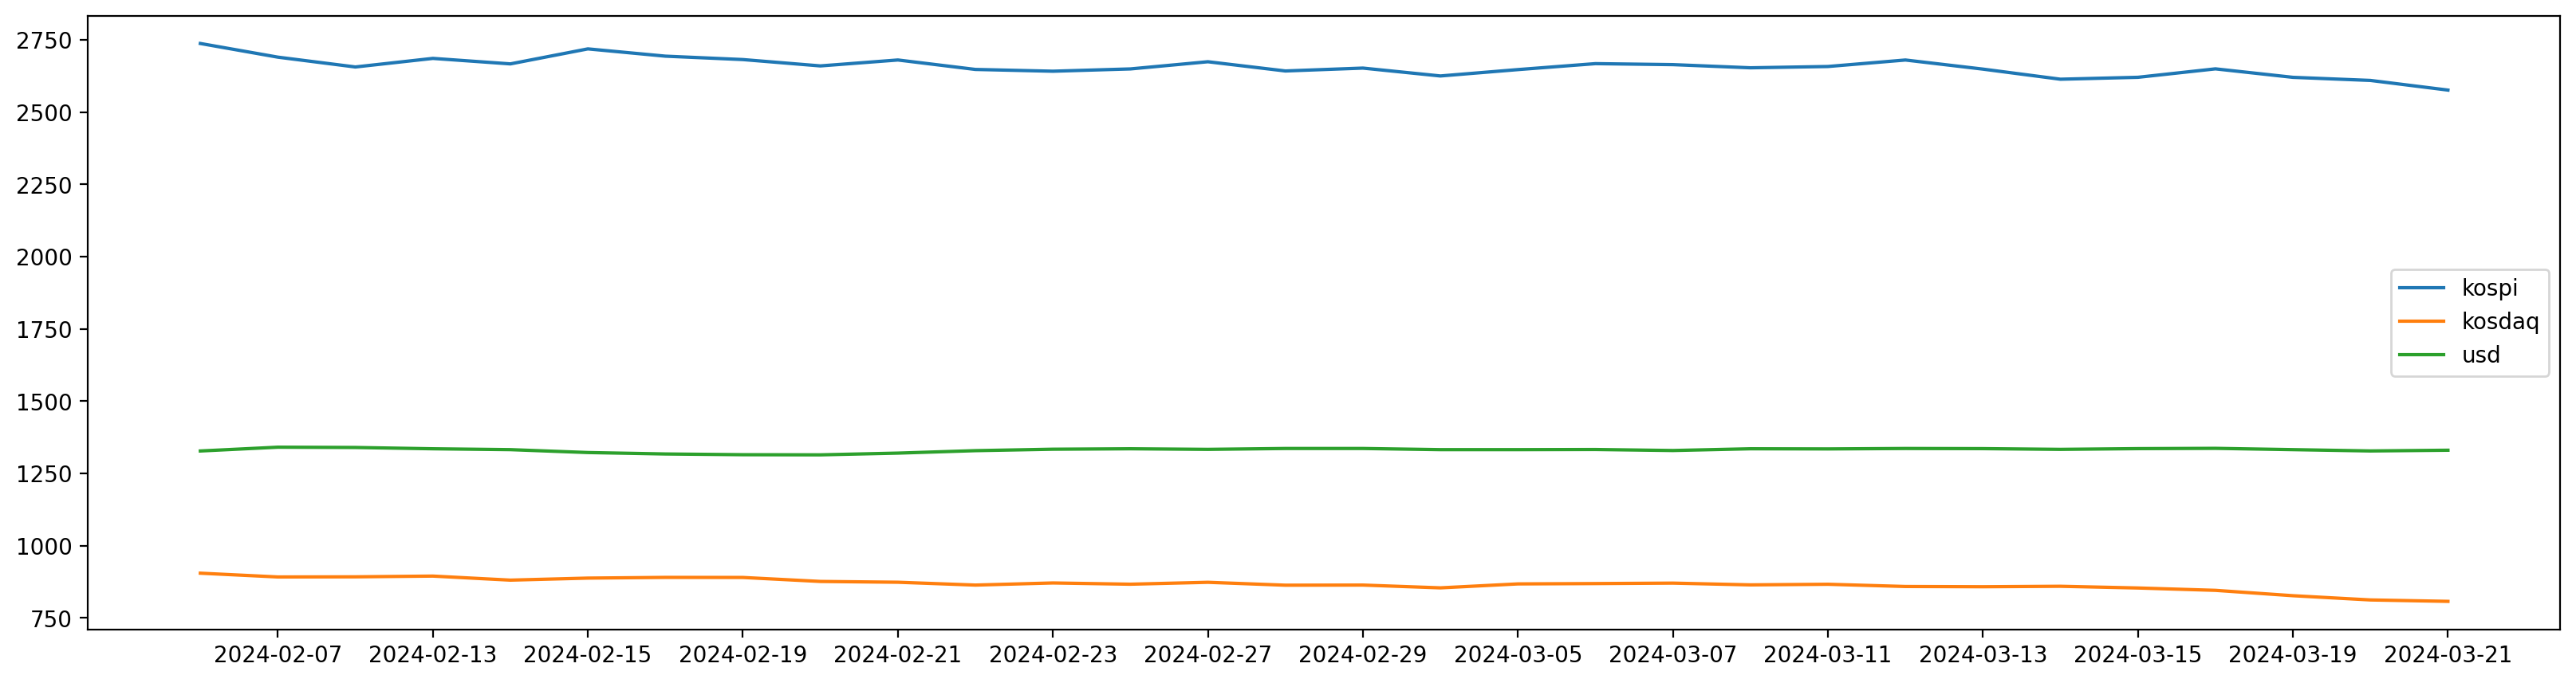

In [21]:
df2 = df[::-1]

plt.figure(figsize=(20,5))
plt.plot(df2['date'], df['kospi'],label='kospi')  # 뒤집고 싶으면 [::-1]넣기
plt.plot(df2['date'], df['kosdaq'], label='kosdaq')
plt.plot(df2['date'], df['usd'], label='usd')
plt.legend()  # 범례
plt.xticks(df['date'][::2])   # xticks : x축을 출력해주는데 , 2칸씩 건너뛰면서 출력
plt.show()

In [22]:
# lambda 함수
# 일회용함수 : 간단한 라라미터와 리턴코드로 되어 있는 함수를 대체
# 함수, 변수 2개 선언 -> 메로리 2칸 사용
def plus(n1, n2):
    return n1 + n2

def calc(func, n1, n2):
    return func(n1, n2) # 콜백 함수

calc(plus, 1, 2)

3

In [23]:
plus_lambda = lambda n1, n2: n1+n2
plus_lambda(1, 2)

3

In [24]:
def calc(func, n1, n2):
    return func(n1, n2) # 콜백 함수

calc(lambda n1, n2: n1+n2, 1, 2)

3

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [25]:
from sklearn.preprocessing import minmax_scale

In [26]:
merge_df_1 = pd.merge(kospi_df, kosdaq_df, on="localTradedAt")
merge_df_2 = pd.merge(merge_df_1, usd_df, on="localTradedAt")
merge_df = merge_df_2.copy()
merge_df.tail(2)

,localTradedAt,closePrice_x,closePrice_y,closePrice
28,2024-02-07,"2,609.58",811.92,"1,327.50"
29,2024-02-06,"2,576.20",807.03,"1,330.00"


In [28]:
# 시각화
plt.figure(figsize=(20, 5))

columns = merge_df.columns[1:]
for column in columns:
    plt.plot(merge_df["localTradedAt"], minmax_scale(merge_df[column]), label=column)
    
xticks_count = 11
plt.xticks(merge_df["localTradedAt"][::int(len(merge_df) // xticks_count) + 1])
plt.legend(loc=0)
plt.show()

ValueError: could not convert string to float: '2,737.45'

<Figure size 2000x500 with 0 Axes>

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [ ]:
# 해석 1 : kospi, kosdaq은 아주 강한 양의 상관관계를 갖는다. (데이터가 같은 방향으로 움직임)
# 해석 2 : kospi와 usd를 강한 음의 상관관계를 갖는다. (데이터가 반대 방향으로 움직임)
corr_df = merge_df[merge_df.columns[1:]].corr()
corr_df

In [ ]:
# 결정계수 : r-squared 
# 1과 가까울수록 강한 관계, 0과 가까울수록 약한 관계
plt.figure(figsize=(20, 5))
sns.heatmap(corr_df**2, cmap="YlGnBu", annot=True)
plt.show()